<h3>Linear Regression</h3>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
X = np.arange(0.0, 5.0, 0.1)

In [3]:
X

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9])

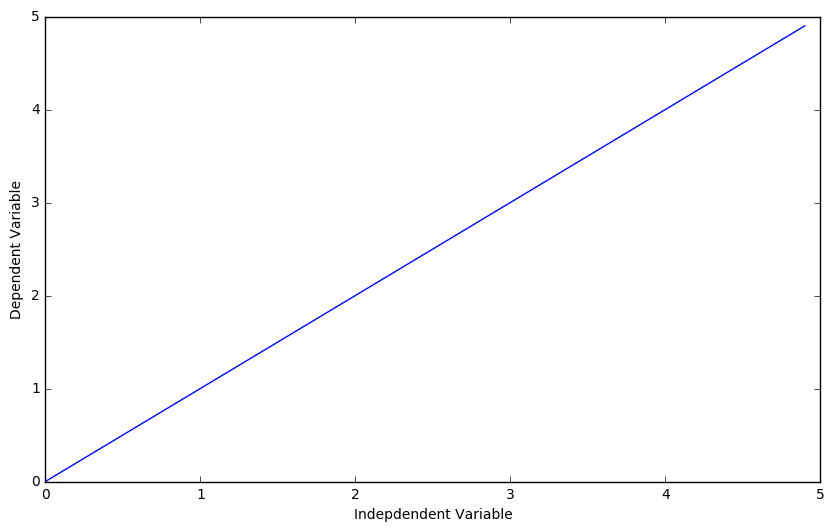

In [8]:
##You can adjust the slope and intercept to verify the changes in the graph
a=1
b=0

Y= a*X + b 

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [9]:
x_data = np.random.rand(100).astype(np.float32)

In [10]:
x_data

array([ 0.7067306 ,  0.10200082,  0.80374312,  0.84862512,  0.85723335,
        0.22167052,  0.86000371,  0.24814582,  0.94500059,  0.16601501,
        0.31978551,  0.41666183,  0.76606631,  0.50373107,  0.79448122,
        0.09372973,  0.39040086,  0.8994689 ,  0.30264848,  0.58576667,
        0.69661736,  0.33083653,  0.74328613,  0.74303341,  0.36401296,
        0.57806534,  0.31341973,  0.92575115,  0.97645921,  0.15332611,
        0.04335665,  0.50670165,  0.02509986,  0.05329177,  0.42962062,
        0.81122428,  0.2264688 ,  0.89577812,  0.36806822,  0.39530712,
        0.79618436,  0.45003867,  0.15124136,  0.79671329,  0.58625025,
        0.59752184,  0.98285383,  0.88026196,  0.81691754,  0.91429687,
        0.30267578,  0.09978163,  0.21399823,  0.5687328 ,  0.19252019,
        0.37006977,  0.17216718,  0.13390632,  0.2570489 ,  0.05207795,
        0.11658405,  0.97487503,  0.35101393,  0.19423622,  0.50947213,
        0.99843812,  0.39523885,  0.70816606,  0.53665489,  0.33

In [11]:
y_data = x_data * 3 + 2
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)

In [18]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

In [28]:
loss = tf.reduce_mean(tf.square(y - y_data))

In [29]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [30]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [32]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [34]:
train_data = []
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 5 == 0:
        print(step, evals)
        train_data.append(evals)

0 [2.5232177, 2.9837625]
5 [2.4419622, 2.2953143]
10 [2.6002407, 2.2133532]
15 [2.7142098, 2.1537549]
20 [2.7964463, 2.1107514]
25 [2.8557854, 2.0797215]
30 [2.8986027, 2.0573313]
35 [2.9294982, 2.0411754]
40 [2.9517915, 2.0295177]
45 [2.9678774, 2.021106]
50 [2.9794846, 2.0150363]
55 [2.98786, 2.0106566]
60 [2.9939036, 2.0074964]
65 [2.9982643, 2.0052159]
70 [3.0014107, 2.0035706]
75 [3.0036812, 2.0023832]
80 [3.0053194, 2.0015266]
85 [3.0065014, 2.0009086]
90 [3.0073545, 2.0004623]
95 [3.0079701, 2.0001404]


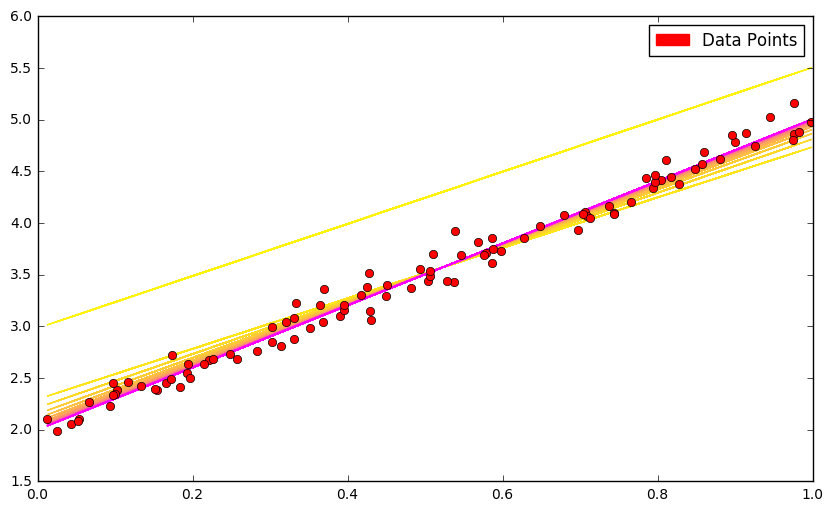

In [35]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()